![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. XX(XX):XX-XX.

<h1><center>Part 2: Standard and Multi-RPYS Analysis</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). The code in this notebook is current as of *metaknowledge* version XXX.

In [2]:
%matplotlib inline

import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

sns.set_style(style="white") # change the default background plot colour
sns.set(font_scale=.7)

plt.rc("savefig", dpi=300) # improve default resolution of graphics

import os
os.chdir('.') # .. is a special symbol for the directory above the current one

In [3]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)

## Standard Reference Publication Year Spectroscopy (RPYS)


In [4]:
stan_results = RC.rpys(1900,2015) # takes a min and max year

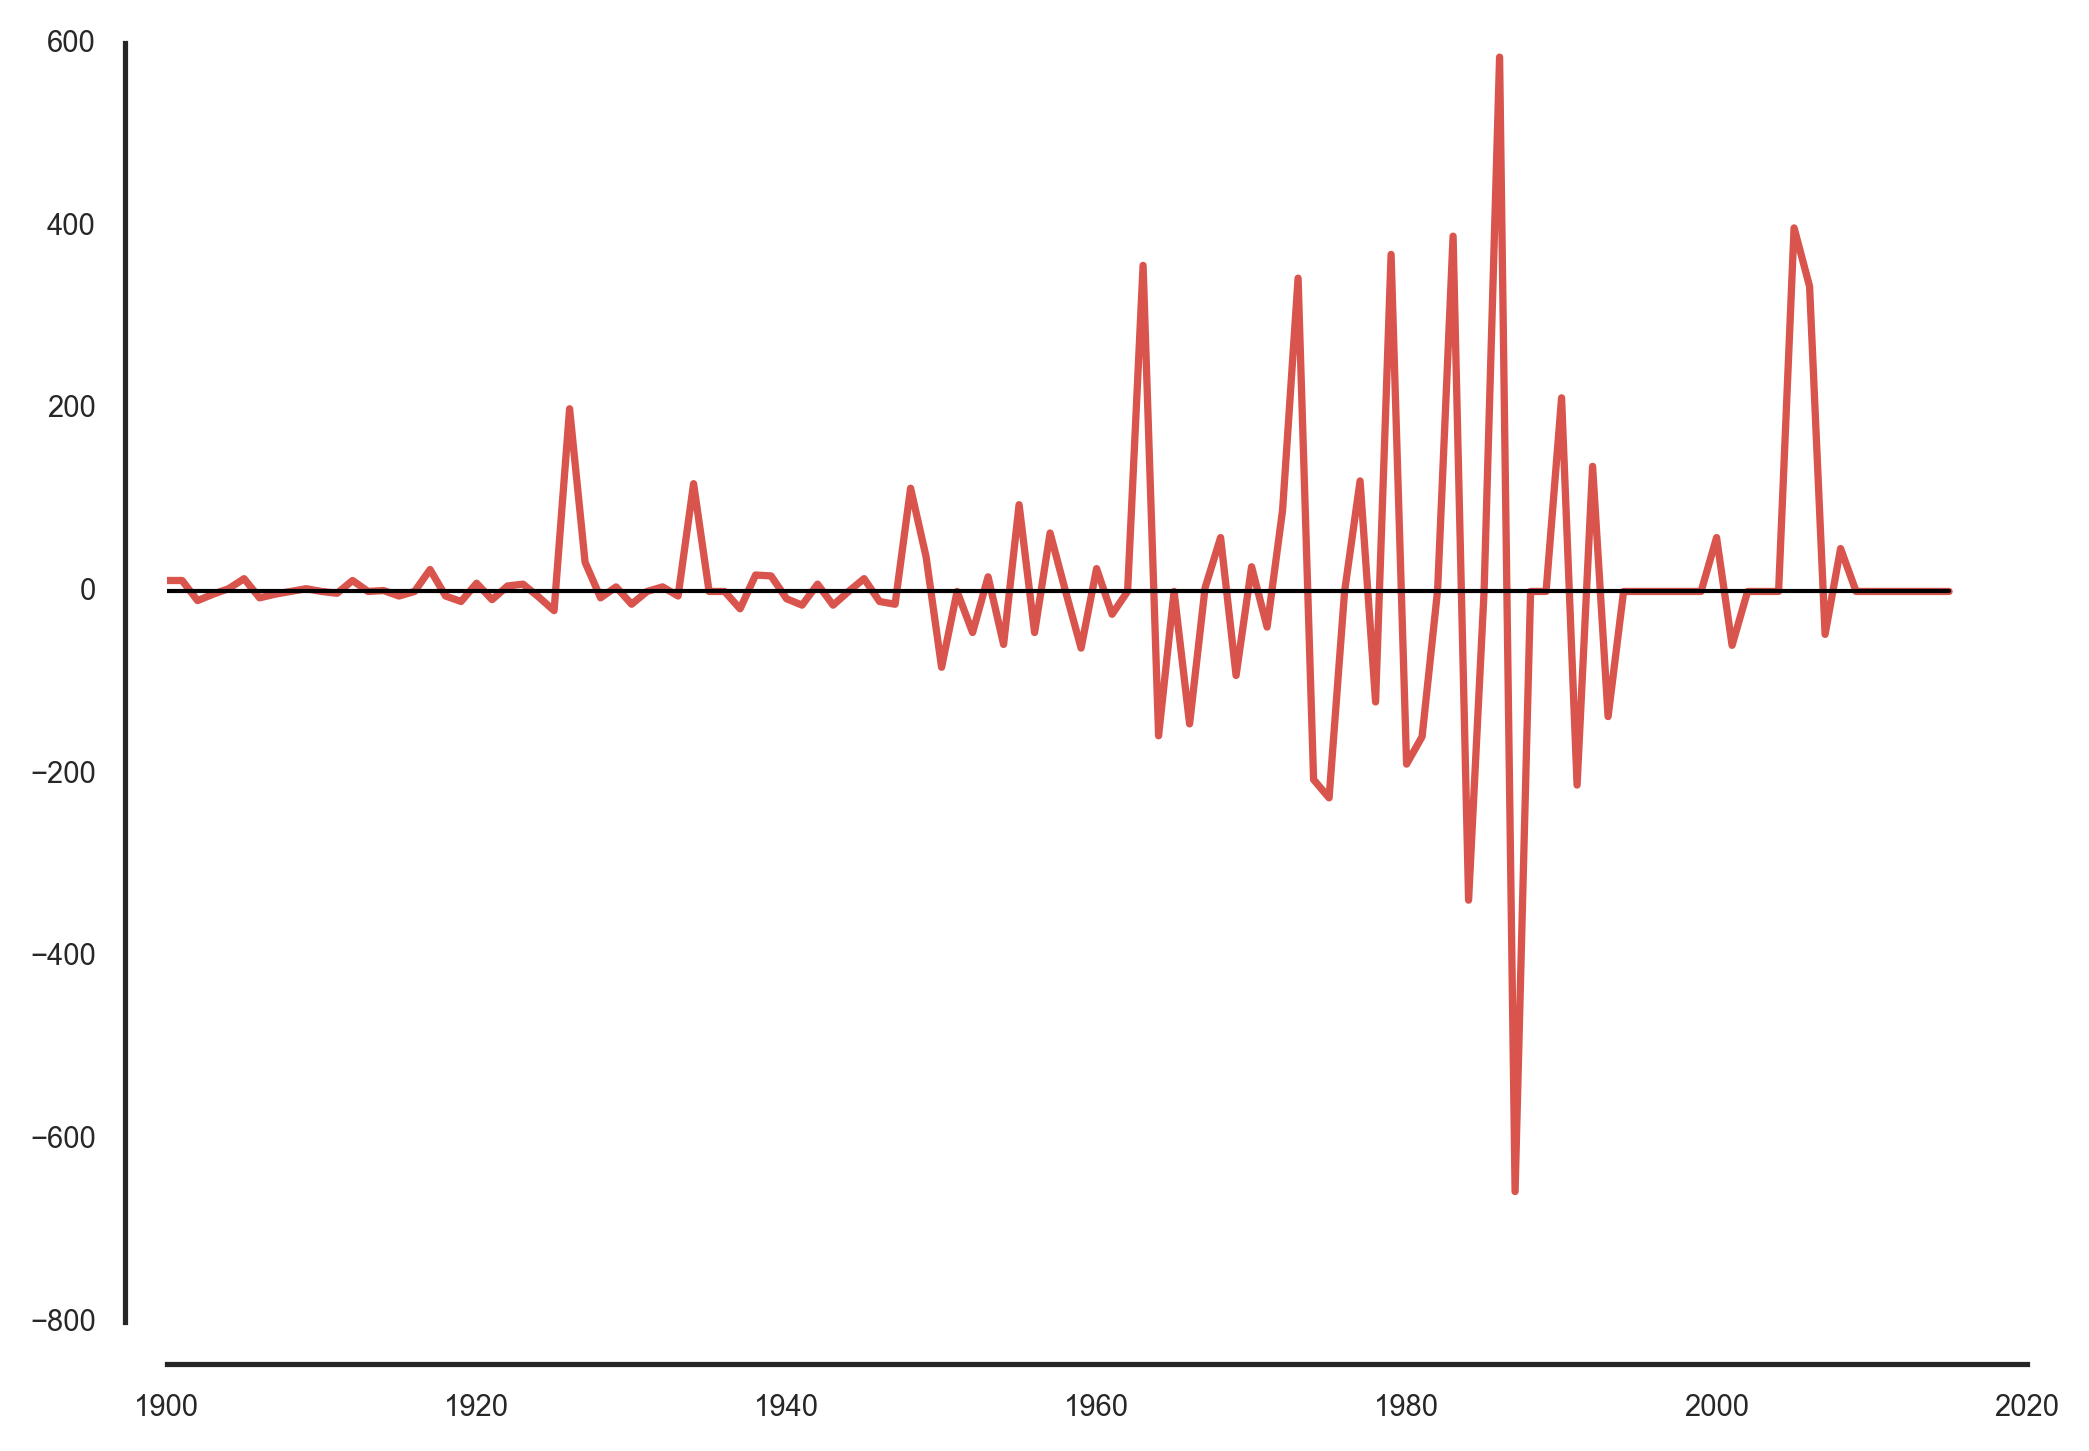

In [5]:
dev_line_color = sns.xkcd_rgb["pale red"]

with sns.axes_style("white"):
    plt.plot(stan_results['year'],stan_results['abs-deviation'], color = dev_line_color)
    plt.plot([1900,2015], [0, 0], linewidth=1, color = "black") # add a line at 0 to emphasize deviations.
    sns.despine(offset=10, trim=True)
plt.savefig("figures/rpys_standard.pdf")

Once we identify a year (or years) that we want to inspect further, we can use the `getCitations` method to see the published records.

In [6]:
year_results = RC.getCitations('year', 1963, pandasFriendly=True)
pandas.DataFrame(year_results).sort(['num-cites'], ascending=False)

/Users/jilliananderson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,author,citeString,fraction-cites-overall,fraction-cites-year,journal,num-cites,year
125,De Solla Price Derek J,"De Solla Price Derek J., 1963, LITTLE SCI BIG SCI",0.187050,0.187050,LITTLE SCI BIG SCI,156,1963
231,Kessler Mm,"KESSLER MM, 1963, AM DOC, V14, P10, DOI 10.100...",0.128297,0.128297,AM DOC,107,1963
159,Price D J D S,"Price D. J. d. S, 1963, LITTLE SCI BIG SCI",0.100719,0.100719,LITTLE SCI BIG SCI,84,1963
117,Garfield E,"GARFIELD E, 1963, AM DOC, V14, P195, DOI 10.10...",0.083933,0.083933,AM DOC,70,1963
68,Price Djd,"PRICE DJD, 1963, LITTLE SCI BIG SCI, P87",0.021583,0.021583,LITTLE SCI BIG SCI,18,1963
136,Abramson N,"Abramson N., 1963, INFORM THEORY CODING",0.020384,0.020384,INFORM THEORY CODING,17,1963
126,Ward Jh,"WARD JH, 1963, J AM STAT ASSOC, V58, P236, DOI...",0.014388,0.014388,J AM STAT ASSOC,12,1963
190,Weinberg Am,"WEINBERG AM, 1963, MINERVA, V1, P159, DOI 10.1...",0.013189,0.013189,MINERVA,11,1963
111,Kelly G A,"Kelly G. A., 1963, THEORY PERSONALITY P",0.010791,0.010791,THEORY PERSONALITY P,9,1963
179,De Solla Price Dj,"De Solla Price D.J., 1963, BIG SCI LITTLE SCI",0.010791,0.010791,BIG SCI LITTLE SCI,9,1963


### Multi RPYS

In [7]:
minYear = 1950
maxYear = 2015

years = range(minYear, maxYear+1)

dictionary = {'CPY': [],
             "abs-deviation": [],
             "num-cites": [],
             "rank": [],
             "RPY": []}
for i in years:
    try:
        RCyear = RC.yearSplit(i, i)
        if len(RCyear) > 0:
            rpys = RCyear.rpys(minYear=minYear, maxYear=maxYear)
            length = len(rpys['year'])
            rpys['CPY'] = [i]*length

            dictionary['CPY'] += rpys['CPY']
            dictionary['abs-deviation'] += rpys['abs-deviation']
            dictionary['num-cites'] += rpys['count']
            dictionary['rank'] += rpys['rank']
            dictionary['RPY'] += rpys['year']
    except:
        pass

multi_rpys = pandas.DataFrame.from_dict(dictionary)
multi_rpys.to_csv("generated_datasets/multi_rpys.csv")

In [8]:
hm_table = multi_rpys.pivot('CPY', 'RPY', 'rank')
hm_table

RPY,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
CPY,,,,,,,,,,,,,,,,,,,,,
1978,59,7,4,60,8,9,5,61,6,10,...,47,48,49,50,51,52,53,54,55,56
1979,10,58,7,57,11,12,8,64,9,13,...,47,48,49,50,51,52,53,54,55,56
1980,6,10,7,11,12,8,58,13,14,60,...,48,49,50,51,52,53,54,55,56,57
1981,12,7,13,58,8,14,15,16,9,59,...,48,49,50,51,52,53,54,55,56,57
1982,12,13,8,59,9,14,7,65,57,4,...,47,48,49,50,51,52,53,54,55,56
1983,57,6,12,54,7,55,13,58,14,8,...,44,45,46,47,48,49,50,51,52,53
1984,10,54,7,12,13,55,14,59,15,3,...,44,45,46,47,48,49,50,51,52,53
1985,11,12,6,13,8,14,15,16,57,17,...,47,48,49,50,51,52,53,54,55,56
1986,12,58,13,7,14,15,16,17,8,10,...,44,45,46,47,48,49,50,51,52,53


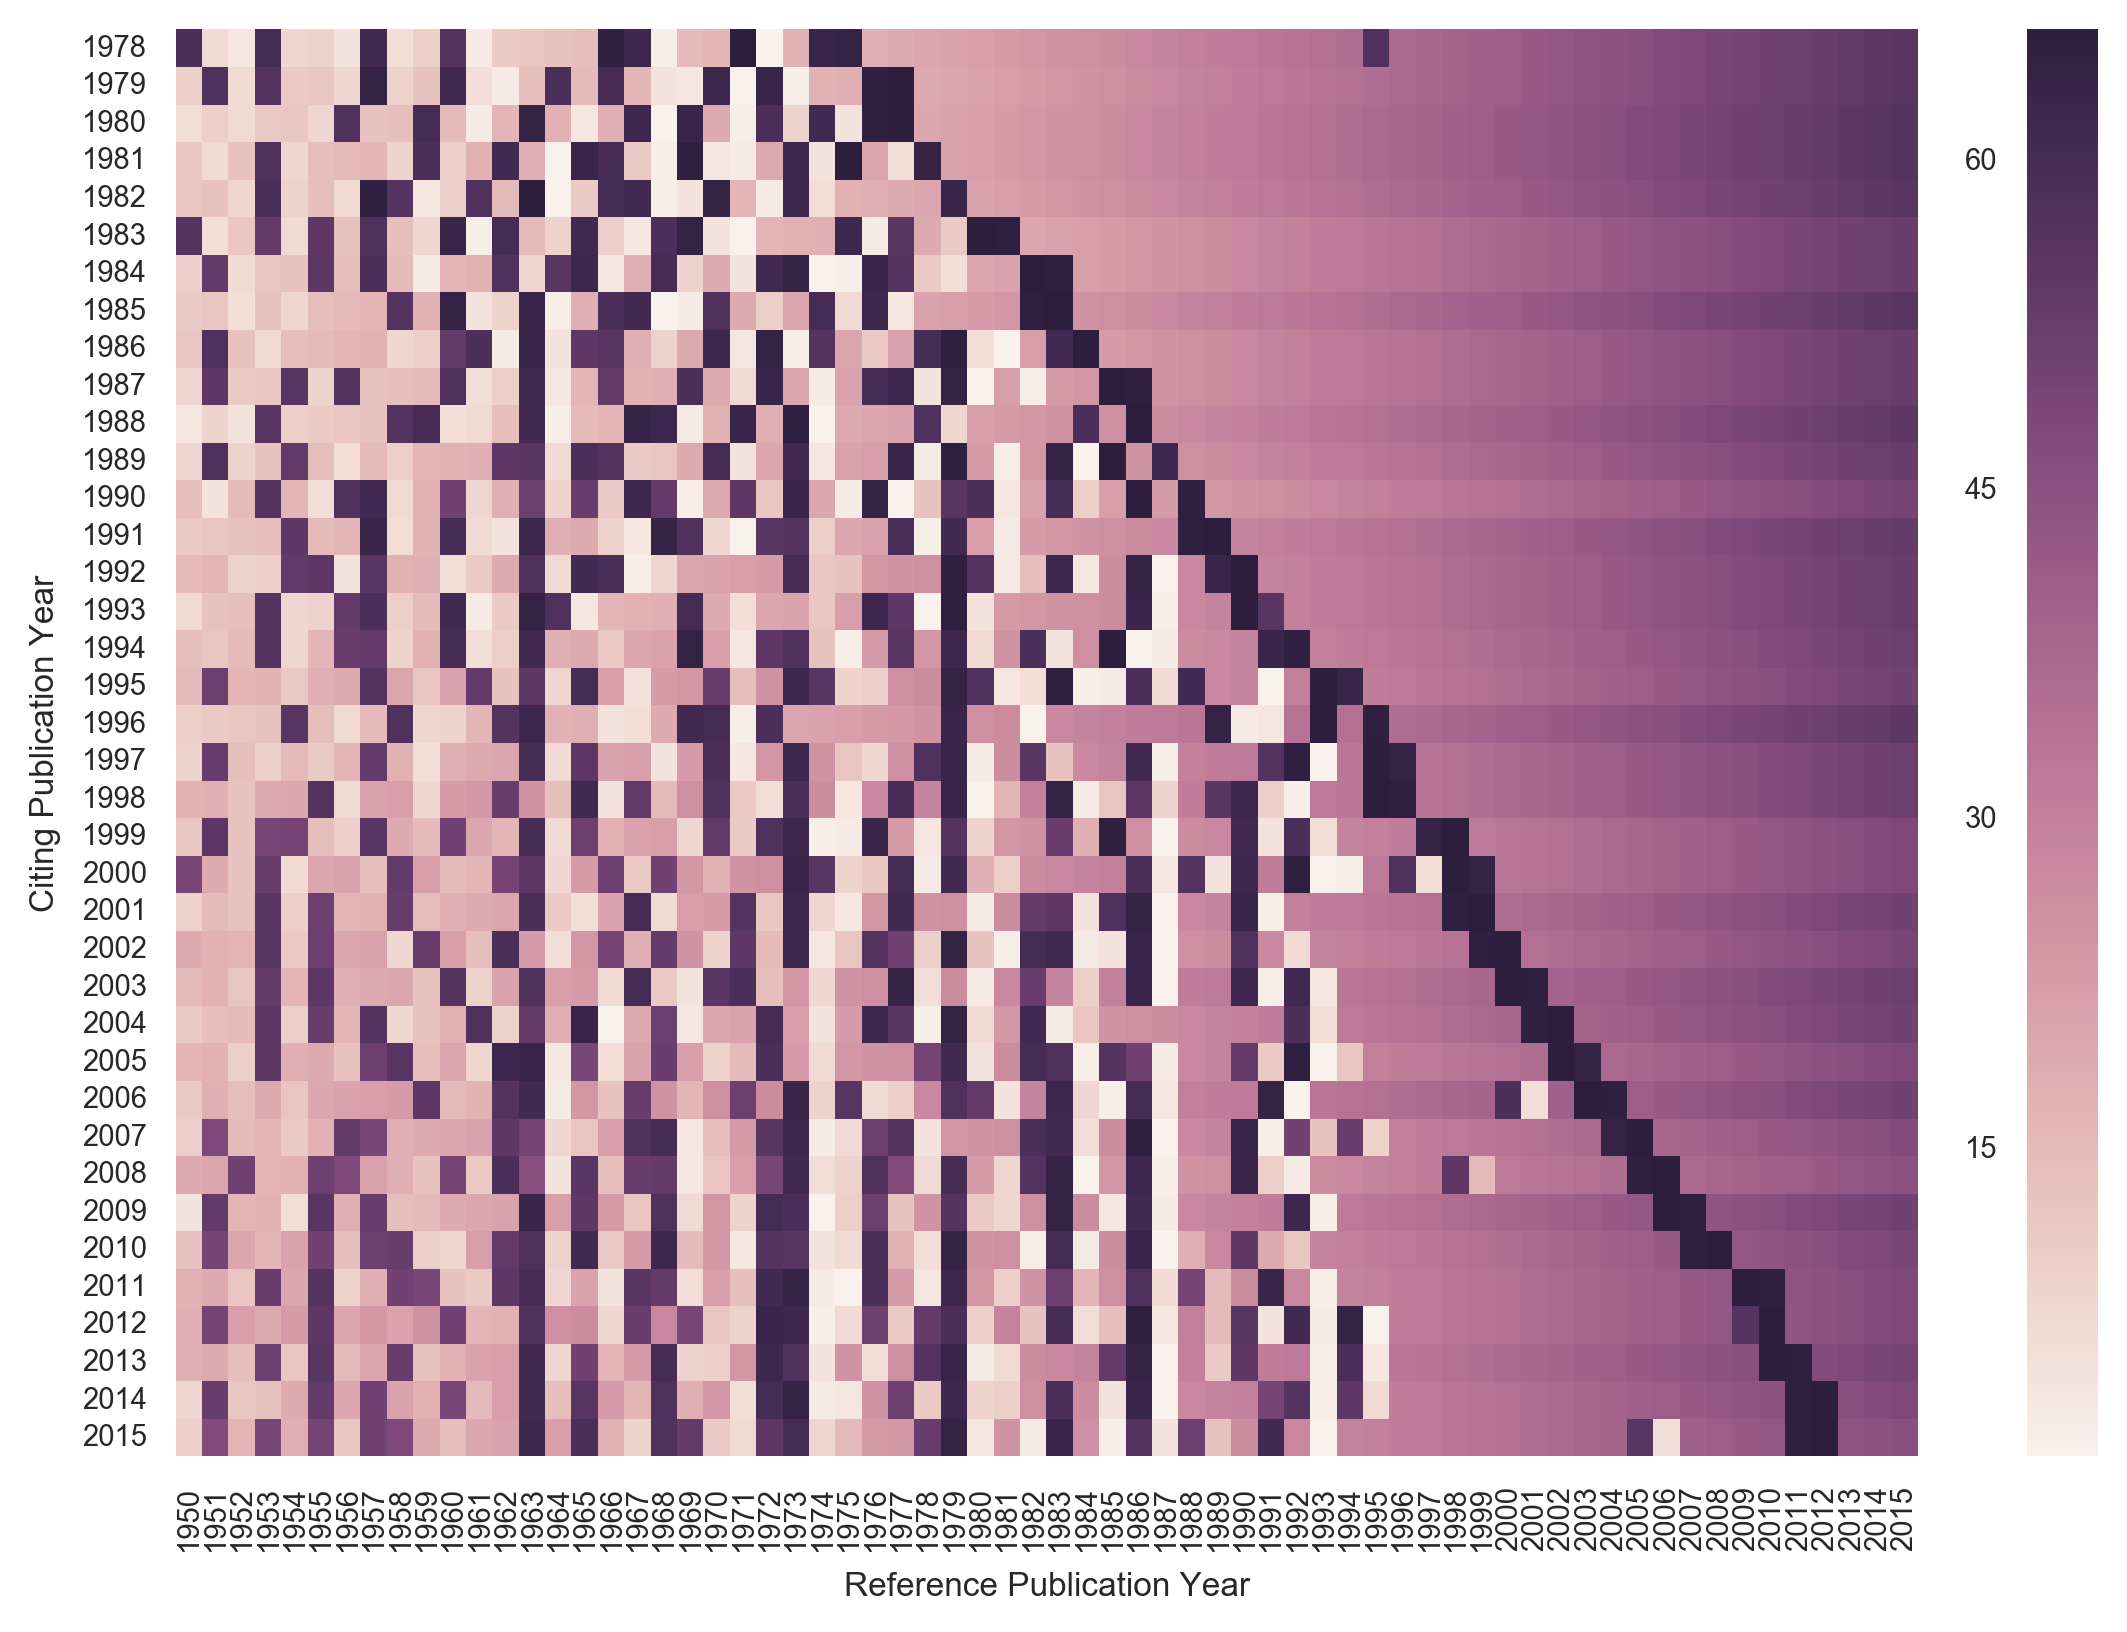

In [9]:
# RIED, ANY IDEA WHY THE HEATMAP GETS DARKER IN THE TOP RIGHT? THAT SUGGESTS THERE IS A MISTAKE, BUT I DON'T KNOW WHAT
# ALSO, THERE IS CLEARLY A ERROR, WHERE ARTICLES FROM 1978 CITING ARTICLES PUBLISHED IN THE 90S

sns.heatmap(hm_table, square = False)
plt.xlabel('Reference Publication Year', size = 8)
plt.ylabel('Citing Publication Year', size = 8)
sns.despine()
plt.tight_layout()
plt.savefig("figures/rpys_multi.pdf")

# Interactive Standard and Multi RPYS Graphs with *mkD3*

### Standard RPYS

In [10]:
# Create the RPYS File
standard_rpys = pandas.DataFrame.from_dict(stan_results)
standard_rpys.to_csv("generated_datasets/standard_rpys.csv")

# Create the Citation File
cits = RC.getCitations()
citations = pandas.DataFrame.from_dict(cits)
citations.to_csv("generated_datasets/standard_citation.csv")

# Create Link to Graphs
from IPython.display import display, HTML, DisplayObject
display(HTML('<a href="mkD3_static/standardBar.html">Open multi RPYS heatmap</a>'))
display(HTML('<a href="mkD3_static/standardLine.html">Open standard RPYS line graph</a>'))

### Multi RPYS

In [12]:
# A multi_rpys file was created earlier,
# now we just need to create the citation file

dictionary = {"author": [],
              "journal": [],
              "cite-string": [],
              "num-cites": [],
              "RPY": [],
              "CPY": []}

for i in years:
    try:
        RCyear = RC.yearSplit(i, i)
        if len(RCyear) > 0:
            citations = RCyear.getCitations(pandasFriendly=True)
            length = len(citations['year'])
            citations['CPY'] = [i]*length

            dictionary['CPY'] += citations['CPY']
            dictionary['author'] += citations['author']
            dictionary['journal'] += citations['journal']
            dictionary['cite-string'] += citations['citeString']
            dictionary['num-cites'] += citations['num-cites']
            dictionary['RPY'] += citations['year']
    except:
        pass

multi_citations = pandas.DataFrame.from_dict(dictionary)
multi_citations.to_csv("generated_datasets/multi_citation.csv")


# Create Link to Heatmap
display(HTML('<a href="mkD3_static/multiRPYS.html">Open multi RPYS heatmap</a>'))
